<a href="https://colab.research.google.com/github/dbowling21/License-Plate-Detection/blob/main/LicensePlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

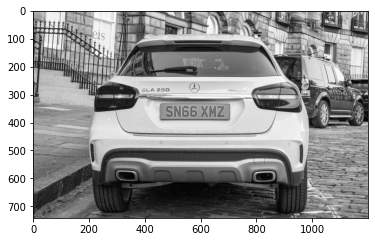

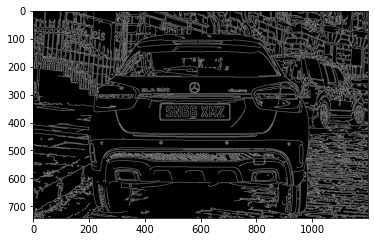

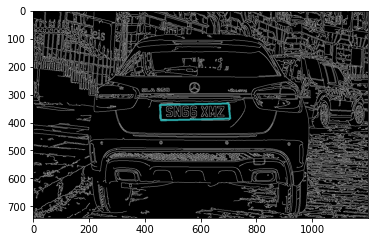

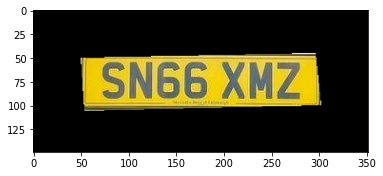

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.




License plate # from image:  SN66 XMZ


In [ ]:
import cv2 as cv
from matplotlib import pyplot
import numpy as np
from PIL import Image #for cropping
!pip install easyocr #AI for text from image detection

#increases output cell to remove scroll bar
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

def show(image, color):
    """ Helper method to display a single image 
    with pyplot """
    if (color == "gray"):
        pyplot.imshow(image, cmap="gray")
    else:
        pyplot.imshow(image)
    pyplot.show()

# Upload image and convert to grayscale then display it
im=cv.imread('test1.jpg')
img = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
show(img, 'gray')

box = np.array([[0.08,0.08,0.08],
                [0.08,0.08,0.08],
                [0.08,0.08,0.08]])
# Average filter to remove noise from the image to make cleaner edge detection 
average = cv.filter2D(img,-1,box)    
# use canny edge detection and display the result  
edges =  cv.Canny(average, 30, 100)
show(edges, 'gray')
print("\n") # formatting to print to pdf nicely
print("\n")
print("\n")
print("\n")
print("\n")
print("\n")

pyplot.imsave('edges.jpeg', edges, cmap='gray', vmin=0, vmax=255)
# create a list of all the contours in the image
contour = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = contour[0] if len(contour) == 2 else contour[1]

edges_gray = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)

detected_rect = []
rectAreas = []
for c in contour:
    #approximate the shape of all contours
    shape = cv.approxPolyDP(c, 10, True)
    #create a list of all contours with four vertices
    if len(shape) == 4:
      detected_rect.append(shape)
      rectAreas.append(cv.contourArea(shape))
#find the "rectangle" with the largest area
plateIndex = rectAreas.index(max(rectAreas))
plate = detected_rect[plateIndex]
#outline the detected plate
cv.drawContours(edges_gray,[plate], 0, (43,171,171), 5)
show(edges_gray, 'RGB')
print("\n")

pyplot.imsave('plate.jpeg', edges_gray)

#mask the image to just show the plate
mask = np.zeros(img.shape, np.uint8)
masked_img = cv.drawContours(mask, [plate], 0,255, -1)
masked_img = cv.bitwise_and(im, im , mask=mask)
masked_img = cv.cvtColor(masked_img, cv.COLOR_BGR2RGB)

#get coordiantes of top left and bottom right corners of plate
x1 = plate[0][0][0]
y1 = plate[0][0][1]
x2 = plate[2][0][0]
y2 = plate[2][0][1]
#assign them to variable with padding for cropping
left = x1 - 50
top = y1 - 50
right = x2 + 50
bottom = y2 + 50
#crop and show the cropped image
im_pil = Image.fromarray(masked_img)
cropped_img = im_pil.crop((left,top, right, bottom))
cropped_img = np.asarray(cropped_img)
pyplot.imsave('cropped_plate.jpeg', cropped_img)
show(cropped_img, 'RGB')
print("\n")

#call the ML model for finding text in images
reader = easyocr.Reader(['en'])
result = reader.readtext(masked_img)
text = result[0][-2]
print("License plate # from image: ", text)
